In [35]:
using JuMP
using Ipopt
using PyPlot

In [41]:
function area(r1,r2,r3,θ1,θ2,θ3)
    return r1*r2*sin(θ2-θ1) + r2*r3*sin(θ3-θ2) - r1*r3*sin(θ3-θ1)
end

model = Model(Ipopt.Optimizer)

register(model, :area, 6, area, autodiff=true)

# variables
@variable(model, 0 <= r[1:4] <= 1)
@variable(model, 0 <= θ[1:4] <= 2π)
@constraint(model, θ[1] == π/2)
@constraint(model, θ[1] <= θ[2])
@constraint(model, θ[2] <= θ[3])
@constraint(model, θ[3] <= θ[4])
A4 = area(r[1],r[2],r[3],θ[1],θ[2],θ[3])
A1 = area(r[2],r[3],r[4],θ[2],θ[3],θ[4])
A2 = area(r[3],r[4],r[1],θ[3],θ[4],θ[1])
A3 = area(r[4],r[1],r[2],θ[4],θ[1],θ[2])
@NLconstraint(model, A3 >= A1)
@NLconstraint(model, A3 >= A2)
@NLconstraint(model, A3 >= A4)
@NLobjective(model, Max, (A1+A3) + A3 )

optimize!(model)

status = termination_status(model)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        1
Number of nonzeros in inequality constraint Jacobian.:       30
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        8
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        8
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        6
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.56e+00 6.15e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00  

LOCALLY_SOLVED::TerminationStatusCode = 4

In [42]:
println( [value(r[i]) for i in 1:4] )
println( [180/π*value(θ[i]) for i in 1:4] )
println( value(A1) )
println( value(A2) )
println( value(A3) )
println( value(A4) )

[1.0000000099973951, 1.0000000099970745, 1.0000000099947903, 1.0000000099970745]
[90.0, 196.30654843151083, 269.9999999072676, 343.69345150838706]
1.3805831005413924
1.9195464555292692
2.4585098069603664
1.9195464519724894


In [46]:
using Combinatorics

[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]


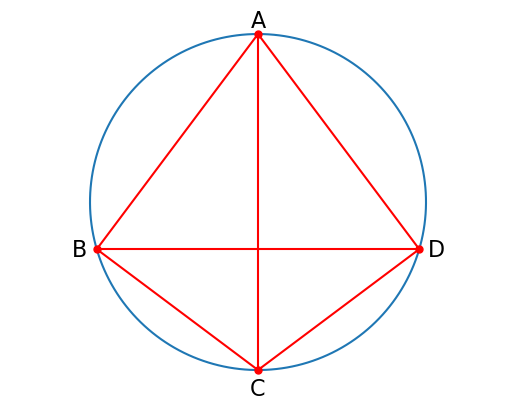

In [61]:
t = range(0, stop=2π, length=200)
plot(sin.(t),cos.(t),"-")
x = [value(r[i]*cos(θ[i])) for i in 1:4]
y = [value(r[i]*sin(θ[i])) for i in 1:4]
plot(x,y,"r.",markersize=10)

for (a,b) in combinations(1:4,2)
    println( [a,b] )
end

for (i,j) in combinations(1:4,2)
    plot([x[i],x[j]],[y[i],y[j]], "r-")
end
text(x[1],y[1]+0.08,"A",verticalalignment="center",horizontalalignment="center",fontsize=16)
text(x[2]-0.1,y[2],"B",verticalalignment="center",horizontalalignment="center",fontsize=16)
text(x[3],y[3]-0.11,"C",verticalalignment="center",horizontalalignment="center",fontsize=16)
text(x[4]+0.1,y[4],"D",verticalalignment="center",horizontalalignment="center",fontsize=16)

axis("equal")
axis("off")
;

In [63]:
value(cos(θ[4]))

0.9597732075392689